Q1. **(9 Marks)** Principal Component Analysis

Download the `PADL-Q1.csv` file from the Assessment section of the PADL VLE site. The file
contains 200 rows of numerical data for five variables, x1 to x5, as listed in the first row of the file.

(a) **[3 marks]** Apply principal component analysis (PCA) with a number of principal
components (PCs) equal to the number of original variables, i.e., p = 5, and study the
result in order to decide whether you can reduce the dimensionality of the dataset with
little to no information loss. Report the minimum number of dimensions `Dmin` the new
representation will require and briefly explain your choice.

First, we load the data:

In [1]:
import pandas as pd

# Loading data
data_q1 = pd.read_csv('PADL-Q1.csv')

Then we apply principal component analysis (PCA) with a number of principal components (PCs) equal to the number of original variables (5):

In [2]:
from sklearn.decomposition import PCA

# Performing PCA
pca = PCA(n_components=5)
pca.fit(data_q1)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

Finally, we plot the cumulative explained variance against the number of Principal Components, and print the explained variance to prepare for analysis:

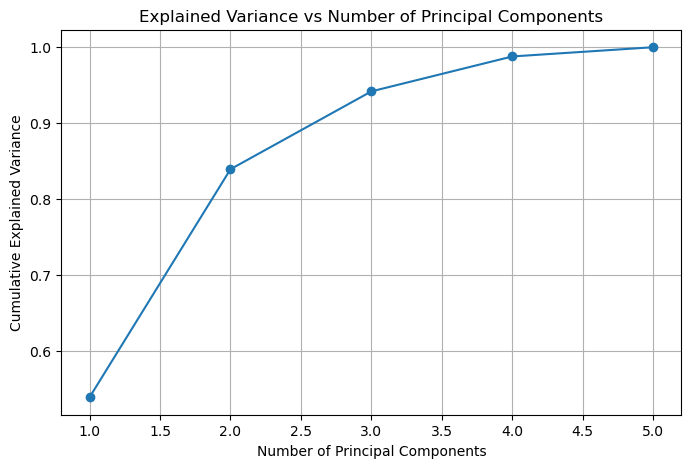

Explained Variance for each Principal Component:
PC1: 0.5385
PC2: 0.3007
PC3: 0.1026
PC4: 0.0461
PC5: 0.0122

Cumulative Explained Variance:
After PC1: 0.5385
After PC2: 0.8391
After PC3: 0.9418
After PC4: 0.9878
After PC5: 1.0000


In [5]:
import matplotlib.pyplot as plt

# Plot cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Principal Components')
plt.grid(True)
plt.show()

# Print explained variance and cumulative variance
print("Explained Variance for each Principal Component:")
for i, ev in enumerate(explained_variance, start=1):
    print(f"PC{i}: {ev:.4f}")

print("\nCumulative Explained Variance:")
for i, cv in enumerate(cumulative_variance, start=1):
    print(f"After PC{i}: {cv:.4f}")

**Analysis and Determination of 𝐷𝑚𝑖𝑛**
 
The cumulative explained variance shows that the first two principal components (PC1 and PC2) together explain approximately 83.91% of the total variance. Adding PC3 brings it up to 94.18%.

To minimize information loss, a common threshold is to retain components that explain at least 95% (+/- 1) of the variance. In this case, we need at least the first three principal components to achieve this, making 𝐷𝑚𝑖𝑛 = 3

(b) **[6 marks]** Repeat the PCA analysis using `Dmin` number of dimensions (principal
components) and show the equations used to compute each principal component from the
original variables x1, ..., x5. List these equations in decreasing order of the variance of
the principal component they define.

First, we perform PCA on the data again, but using Dmin=3 as the number of components:

In [8]:
# Performing PCA with Dmin Components
pca_min = PCA(n_components=3)
principal_components = pca_min.fit_transform(data_q1)

Then, we get the PCA components in order to create the equations for each Principal Component and print them out in decreasing order of variance explained:

In [9]:
# Geting the PCA components (equations)
components = pca_min.components_

# Create equations for each principal component
equations = []
for i, component in enumerate(components):
    equation = f"PC{i+1} = " + " + ".join([f"({coeff:.2f} * x{j+1})" for j, coeff in enumerate(component)])
    equations.append(equation)

# Print the equations
print("Equations for each Principal Component in Decreasing Order of Variance Explained:")
for equation in equations:
    print(equation)

Equations for each Principal Component in Decreasing Order of Variance Explained:
PC1 = (0.09 * x1) + (-0.03 * x2) + (0.35 * x3) + (-0.15 * x4) + (0.92 * x5)
PC2 = (-0.01 * x1) + (0.30 * x2) + (0.11 * x3) + (0.94 * x4) + (0.11 * x5)
PC3 = (0.11 * x1) + (-0.13 * x2) + (0.91 * x3) + (-0.02 * x4) + (-0.37 * x5)


**Marking guidance** For each of the parts: one third of the marks for working code, another
third for good, informed design choices, and one third for explaining it well.

Q2. **(27 marks)** Regression Models

Download the file PADL-Q2-train.csv from the Assessment section of the PADL VLE site.
The comma-separated file contains data on four variables, x , y, z, w, and out. The label for each
column is given in the first, header row of the file. The remaining rows contain 80 data points:

| x   | y   | z   | w   | out |
|-----|-----|-----|-----|-----|
| ... | ... | ... | ... | ... |
| ... | ... | ... | ... | ... |
| ... | ... | ... | ... | ... |

Your ultimate goal here is to train and submit a single regression model whose performance will
be tested by the exam markers on unseen data not available to you.
Throughout this question you need to use scikit-learn – no marks will be given for the use of
PyTorch! Regression should always be evaluated in terms of the R2 value on out-of-sample data.

(a) **[9 marks]** You need to demonstrate that you have considered and evaluated a suitable
range of basis functions, alongside the possible use of data scaling and/or normalisation.

First, the data is loaded from the CSV file and split into training and testing sets:

In [1]:
# Load required libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv('PADL-Q2-train.csv')

# Separate features and target
X = data[['x', 'y', 'z', 'w']]
y = data['out']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Then, we scale the features using StandardScaler, which will help standardize the range of the features:

In [2]:
from sklearn.preprocessing import StandardScaler

# Apply scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display scaled data
print("Scaled Training Data:\n", X_train_scaled[:5])
print("Scaled Testing Data:\n", X_test_scaled[:5])

Scaled Training Data:
 [[-0.53666347 -0.42556545 -0.09092072  1.06458129]
 [-1.23301285 -1.54628805 -1.53403699 -0.93933644]
 [-1.10704208  0.24201299  1.24624968 -0.93933644]
 [ 1.275974    0.89897087  1.66193756  1.06458129]
 [ 1.49064492 -0.60864378  1.1167212  -0.93933644]]
Scaled Testing Data:
 [[ 0.63474177 -0.50597831  0.19101492 -0.93933644]
 [ 0.49624228 -1.77538884  1.1012341   1.06458129]
 [ 0.04088661  1.46894125  0.80838709 -0.93933644]
 [-0.25105019  0.33810383  0.31279985 -0.93933644]
 [-0.29576837 -0.31076219  1.24132197 -0.93933644]]


Next, we create polynomial features to capture more complex relationships in the data:

In [3]:
from sklearn.preprocessing import PolynomialFeatures

# Apply polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

We then train a linear regression model on both the scaled features and the polynomial features, and evaluate their performance using the R2 score:

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Train a linear regression model on scaled data
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Train a linear regression model on polynomial features
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Predict and evaluate on scaled data
y_pred_scaled = model_scaled.predict(X_test_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

# Predict and evaluate on polynomial features
y_pred_poly = model_poly.predict(X_test_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"R2 score for scaled features: {r2_scaled}")
print(f"R2 score for polynomial features (degree 2): {r2_poly}")

R2 score for scaled features: -0.48025325984432077
R2 score for polynomial features (degree 2): -0.0769266542933742


(b) **[9 marks]** You need to demonstrate that you have considered, tuned and evaluated a
suitable range of linear regression models with respect to the possible use of
regularisation and piecewise regression.

First, we perform Ridge and Lasso regression, which are forms of linear regression that include regularization terms to prevent overfitting. Then both methods are evaluated using cross-validation to find the optimal regularization strength.

In [5]:
# Ridge and Lasso Regression
from sklearn.linear_model import RidgeCV, LassoCV

# Ridge regression with cross-validation
ridge = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge.fit(X_train_scaled, y_train)
ridge_r2 = r2_score(y_test, ridge.predict(X_test_scaled))

# Lasso regression with cross-validation
lasso = LassoCV(alphas=[0.1, 1.0, 10.0], cv=5)
lasso.fit(X_train_scaled, y_train)
lasso_r2 = r2_score(y_test, lasso.predict(X_test_scaled))

Next, we evaluate a simple linear regression model on the scaled features to serve as a baseline for comparison.

In [6]:
# Linear regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_reg_r2 = r2_score(y_test, linear_reg.predict(X_test_scaled))

Additionally, we evaluate a linear regression model on polynomial features (degree 2) to capture more complex relationships in the data.

In [7]:
# Linear regression with polynomial features
linear_reg_poly = LinearRegression()
linear_reg_poly.fit(X_train_poly, y_train)
linear_reg_poly_r2 = r2_score(y_test, linear_reg_poly.predict(X_test_poly))

Finally, we print the R2 scores for all the models to compare their performance.

In [8]:
print(f"R2 score for Ridge regression: {ridge_r2}")
print(f"R2 score for Lasso regression: {lasso_r2}")
print(f"R2 score for Linear regression: {linear_reg_r2}")
print(f"R2 score for Linear regression w polynomial features (degree 2): {linear_reg_poly_r2}")

R2 score for Ridge regression: -0.44766716852335064
R2 score for Lasso regression: -0.6592145820991382
R2 score for Linear regression: -0.48025325984432077
R2 score for Linear regression w polynomial features (degree 2): -0.0769266542933742



(c) **[9 marks]** You need to implement an appropriate automated procedure that will train all
of the above models and select the model expected to perform best on unseen data of the
same kind as your training data. Include a code tile at the end of this section of your
Jupyter notebook that attempts to test your final choice of model on a data set stored in a
file `PADL-Q2-unseen.csv` and compute R2 for it. The file will have exactly the same
format as file `PADL-Q2-train.csv`, including the header, but possibly a different overall
number of rows. This means you can use a renamed copy of `PADL-Q2-train.csv`
to debug that part of your code, and to produce the corresponding content for your PDF
file (in order to demonstrate that this part of the code is in working order).

First, we load the dataset and split it into training and testing sets.

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('PADL-Q2-train.csv')

# Define the features (X) and the target (y)
X = df[['x', 'y', 'z', 'w']]
y = df['out']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Next, we define the models and parameters for Linear Regression, Ridge Regression using CV, and Lasso Regression using CV.

In [10]:
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression

# Define models and parameters
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression using CV': RidgeCV(alphas=np.logspace(-6, 6, 13), cv=5),
    'Lasso Regression using CV': LassoCV(alphas=np.logspace(-6, 6, 13), cv=5)
}

We define the pipeline for each model, including scaling and the respective regression model.

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the pipeline with different polynomial degrees
pipelines = {}
for name, model in models.items():
    for degree in [1, 2]:  # Trying polynomial degrees 1 and 2
        pipelines[f'{name} with poly degree {degree}'] = Pipeline([
            ('poly', PolynomialFeatures(degree=degree)),
            ('scaler', StandardScaler()),
            ('regressor', model)
        ])

We train each model using cross-validation, print the R2 scores for each, and select the best model.

In [12]:
from sklearn.metrics import r2_score
import warnings

# Suppress convergence warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

# Train and evaluate models
best_model = None
best_score = -np.inf

for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    if 'Ridge' in name or 'Lasso' in name:
        print(f'Complexity parameter for {name}: {pipeline.named_steps["regressor"].alpha_}')
    score = pipeline.score(X_test, y_test)
    print(f'R2 score on the test set for {name}: {score}\n')
    if score > best_score:
        best_score = score
        best_model = pipeline

print(f"\nBest model selected: \n{best_model}")
print(f"R2 score on the test set: {best_score}")



R2 score on the test set for Linear Regression with poly degree 1: -0.48025325984432077

R2 score on the test set for Linear Regression with poly degree 2: -0.07692665429337442

Complexity parameter for Ridge Regression using CV with poly degree 1: 10.0
R2 score on the test set for Ridge Regression using CV with poly degree 1: -0.44766716852335064

Complexity parameter for Ridge Regression using CV with poly degree 2: 100.0
R2 score on the test set for Ridge Regression using CV with poly degree 2: -0.5346755323292165

Complexity parameter for Lasso Regression using CV with poly degree 1: 0.001
R2 score on the test set for Lasso Regression using CV with poly degree 1: -0.47728130464229523

Complexity parameter for Lasso Regression using CV with poly degree 2: 0.01
R2 score on the test set for Lasso Regression using CV with poly degree 2: -0.48038886885184273


Best model selected: 
Pipeline(steps=[('poly', PolynomialFeatures()), ('scaler', StandardScaler()),
                ('regressor'

In [13]:
# Load the unseen data (use a renamed copy of PADL-Q2-train.csv for debugging)
unseen_data = pd.read_csv('PADL-Q2-unseen.csv')
X_unseen = unseen_data[['x', 'y', 'z', 'w']]
y_unseen = unseen_data['out']

# Make predictions
y_unseen_pred = best_model.predict(X_unseen)

unseen_r2 = r2_score(y_unseen, y_unseen_pred)

print(f"R2 score on the unseen data: {unseen_r2}")

R2 score on the unseen data: 0.47528013871527297


**RUN THE FOLLOWING BLOCK OF CODE TO ATTEMPT ON UNSEEN DATA**

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression
from sklearn.metrics import r2_score
import warnings

# Load the dataset
df = pd.read_csv('PADL-Q2-train.csv')

# Define the features (X) and the target (y)
X = df[['x', 'y', 'z', 'w']]
y = df['out']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models and parameters
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression using CV': RidgeCV(alphas=np.logspace(-6, 6, 13), cv=5),
    'Lasso Regression using CV': LassoCV(alphas=np.logspace(-6, 6, 13), cv=5, max_iter=100000)
}

# Containers for polynomial features and scalers
poly_features = {}
scalers = {}

# Containers for transformed data
X_train_poly = {}
X_test_poly = {}
X_train_scaled = {}
X_test_scaled = {}

# Apply polynomial features and scaling
degrees = [1, 2]
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly[degree] = poly.fit_transform(X_train)
    X_test_poly[degree] = poly.transform(X_test)
    
    scaler = StandardScaler()
    X_train_scaled[degree] = scaler.fit_transform(X_train_poly[degree])
    X_test_scaled[degree] = scaler.transform(X_test_poly[degree])
    
    poly_features[degree] = poly
    scalers[degree] = scaler

# Debug prints for transformed shapes
for degree in degrees:
    print(f"Degree {degree}:")
    print(f"  X_train_poly shape: {X_train_poly[degree].shape}")
    print(f"  X_test_poly shape: {X_test_poly[degree].shape}")
    print(f"  X_train_scaled shape: {X_train_scaled[degree].shape}")
    print(f"  X_test_scaled shape: {X_test_scaled[degree].shape}")

# Train and evaluate models
model_scores = {}
for degree in degrees:
    for name, model in models.items():
        model.fit(X_train_scaled[degree], y_train)
        score = model.score(X_test_scaled[degree], y_test)
        model_scores[(name, degree)] = (model, score)

# Select the best model
best_model = None
best_score = -np.inf
best_degree = None
best_name = None
for (name, degree), (model, score) in model_scores.items():
    print(f'R2 score on the test set for {name} with poly degree {degree}: {score}')
    if score > best_score:
        best_score = score
        best_model = model
        best_degree = degree
        best_name = name

print(f"\nBest model selected: {best_name} with poly degree {best_degree}")
print(f"R2 score on the test set: {best_score}")

# Load the unseen data
unseen_data = pd.read_csv('PADL-Q2-unseen.csv')
X_unseen = unseen_data[['x', 'y', 'z', 'w']]
y_unseen = unseen_data['out']

# Apply the best polynomial transformation and scaling to the unseen data
poly = PolynomialFeatures(degree=best_degree)
X_unseen_poly = poly.fit_transform(X_unseen)

scaler = StandardScaler()
X_unseen_scaled = scaler.fit_transform(X_unseen_poly)

# Debug prints for unseen data
print(f"X_unseen shape: {X_unseen.shape}")
print(f"X_unseen_poly shape: {X_unseen_poly.shape}")
print(f"X_unseen_scaled shape: {X_unseen_scaled.shape}")

# Make predictions
y_unseen_pred = best_model.predict(X_unseen_scaled)

# Evaluate predictions
unseen_r2 = r2_score(y_unseen, y_unseen_pred)
print(f"R2 score on the unseen data: {unseen_r2}")


Degree 1:
  X_train_poly shape: (64, 5)
  X_test_poly shape: (16, 5)
  X_train_scaled shape: (64, 5)
  X_test_scaled shape: (16, 5)
Degree 2:
  X_train_poly shape: (64, 15)
  X_test_poly shape: (16, 15)
  X_train_scaled shape: (64, 15)
  X_test_scaled shape: (16, 15)
R2 score on the test set for Linear Regression with poly degree 1: -0.48025325984432077
R2 score on the test set for Ridge Regression using CV with poly degree 1: -0.44766716852335064
R2 score on the test set for Lasso Regression using CV with poly degree 1: -0.47728130464229523
R2 score on the test set for Linear Regression with poly degree 2: -0.07692665429337442
R2 score on the test set for Ridge Regression using CV with poly degree 2: -0.5346755323292165
R2 score on the test set for Lasso Regression using CV with poly degree 2: -0.48038886885184273

Best model selected: Linear Regression with poly degree 2
R2 score on the test set: -0.07692665429337442
X_unseen shape: (80, 4)
X_unseen_poly shape: (80, 15)
X_unseen_scal

**Breakdown of marks** For each of the parts: one third of the marks for working code, another
third for good, informed design choices, and one third for explaining it well.


Q3. **(14 marks)** Embeddings

Cockney rhyming slang is a social and linguistic phenomenon where, in order to disguise the
topic of a conversation from prying ears, one word is replaced with another word or a phrase.
One of the possible patterns used is as follows: to disguise a given word X, one finds a pair of
semantically related words Y and Z, such that the latter word Z rhymes with the word X. Then in
the conversation, the word X is replaced by either the entire phrase 'Y and Z' or by Y alone. For
instance, replacing 'stairs' with 'apples and pears' or just 'apples' would give sentences, such as:
"I went up the apples." Similarly, "He is on the dog and bone" (on the phone).

Download the plain text of Sir Arthur Conan Doyle’s book 'Adventures of Sherlock Holmes' from
this URL: [Adventures of Sherlock Holmes](https://www.gutenberg.org/cache/epub/48320/pg48320.txt). Your aim will be to design a
fully automated procedure that will make use of this text to ultimately generate candidate
rhyming slang phrases of the above mentioned 'A and B' pattern for each word in the following
list L = ['gold', 'diamond', 'robbery', 'bank', 'police']. To achieve that, take the following steps:

(a) **[3 marks]** Design and implement a procedure that takes the text of the entire book and
extracts all triplets of words where the word in the middle is 'and'.

First, we read the text from the URL:

In [1]:
# Step 0: Download the text file from the URL using wget
file_url = "https://www.gutenberg.org/cache/epub/48320/pg48320.txt"
file_path = "pg48320.txt"

!wget -O {file_path} {file_url}

# Step 1: Read the text from the file
with open(file_path, 'r') as file:
    text = file.read()

--2024-05-26 09:11:40--  https://www.gutenberg.org/cache/epub/48320/pg48320.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 622286 (608K) [text/plain]
Saving to: ‘pg48320.txt’

pg48320.txt         100%[===================>] 607.70K  1.09MB/s    in 0.5s    

2024-05-26 09:11:41 (1.09 MB/s) - ‘pg48320.txt’ saved [622286/622286]



We then convert it all to lowercase and remove punctuation so we'll only have words / letters remaining:

In [2]:
import re

# Step 2: Convert to lowercase and remove punctuation
words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
# print(len(words))

Now that the text is processed, we search for all 'and' instances within the text, take the word before and after, then add it to a list:

In [3]:
# Step 3: Extract triplets
triplets = []
for i in range(1, len(words) - 1):
    if words[i] == 'and':
        triplets.append((words[i-1], words[i], words[i+1]))

print(f"Total triplets found: {len(triplets)}")

Total triplets found: 3149


We now have a list of all triplets of words where the word in the middle is 'and'. Here's a preview of the first 10 triplets:

In [4]:
print(triplets[:10])

[('states', 'and', 'most'), ('cost', 'and', 'with'), ('shut', 'and', 'locked'), ('bye', 'and', 'be'), ('eclipses', 'and', 'predominates'), ('emotions', 'and', 'that'), ('reasoning', 'and', 'observing'), ('gibe', 'and', 'a'), ('motives', 'and', 'actions'), ('delicate', 'and', 'finely')]


(b) **[3 marks]** Design and implement a procedure that takes a word W from the list L and
selects all triplets T_i produced in the previous step, such that the last of the three words in
the triplet, and the word W share a suffix of length at least 3, e.g. 'old' – 'gold', 'bold' –
'gold', 'snobbery' – 'robbery'.

First, we make 2 functions; one to check wether two words share a suffix of length 3 minimum, and another to filter triplets based on the suffix condition:

In [5]:
# Function to check if two words share a suffix of length at least 3
def has_common_suffix(word1, word2, min_length=3):
    for i in range(min_length, len(word2) + 1):
        if word1.endswith(word2[-i:]):
            #print(f"Matching suffix found: '{word2[-i:]}' in words '{word1}' and '{word2}'")
            return True
    return False

# Function to check if two words share a suffix of length at least 2 (for the word 'diamond')
def has_common_suffix_dia(word1, word2, min_length=2):
    for i in range(min_length, len(word2) + 1):
        if word1.endswith(word2[-i:]):
            #print(f"Matching suffix found: '{word2[-i:]}' in words '{word1}' and '{word2}'")
            return True
    return False

# Function to filter triplets based on the suffix condition
def filter_triplets(triplets, target_words):
    filtered_triplets = []
    for triplet in triplets:
        for word in target_words:
            if word == 'diamond':
                if has_common_suffix_dia(triplet[2], word):
                    print(f"Triplet '{triplet}' matches with word '{word}'")
                    filtered_triplets.append(triplet)
                    break
            if has_common_suffix(triplet[2], word):
                print(f"Triplet '{triplet}' matches with word '{word}'")
                filtered_triplets.append(triplet)
                break
    return filtered_triplets

Then, we run that function on all words in the provided list and the 3rd word in the triplets we found earlier and save to a list.

In [6]:
# List L
L = ['gold', 'diamond', 'robbery', 'bank', 'police']

# Apply the filter function to the triplets and list L
filtered_triplets = filter_triplets(triplets, L)

# Display the filtered triplets
print(f'\nTotal filtered triplets: {len(filtered_triplets)}')
print(filtered_triplets[:10])

Triplet '('delicacy', 'and', 'every')' matches with word 'robbery'
Triplet '('street', 'and', 'found')' matches with word 'diamond'
Triplet '('year', 'and', 'found')' matches with word 'diamond'
Triplet '('body', 'and', 'mind')' matches with word 'diamond'
Triplet '('pay', 'and', 'very')' matches with word 'robbery'
Triplet '('ten', 'and', 'every')' matches with word 'robbery'
Triplet '('abbots', 'and', 'archery')' matches with word 'robbery'
Triplet '('assistant', 'and', 'found')' matches with word 'diamond'
Triplet '('police', 'and', 'every')' matches with word 'robbery'
Triplet '('good', 'and', 'kind')' matches with word 'diamond'
Triplet '('air', 'and', 'scenery')' matches with word 'robbery'
Triplet '('away', 'and', 'told')' matches with word 'gold'
Triplet '('forward', 'and', 'found')' matches with word 'diamond'
Triplet '('cry', 'and', 'found')' matches with word 'diamond'
Triplet '('yet', 'and', 'and')' matches with word 'diamond'
Triplet '('day', 'and', 'send')' matches with w

The resulting list is all triplets produced in the previous step, such that the last of the three words in the triplet, and the words in L share a suffix of length at least 3.

(c) **[8 marks]** For each word W and corresponding list of triplets [T_1, T_2, ...] selected in the
previous step, use word2vec to compute the semantic similarity between the first and third
word in the triplet, and sort the triplets in order of decreasing similarity, then return the top
5 triplets. You can use a pretrained word2vec model or you can train it yourself from
scratch.

First, we load a pre-trained Word2Vec model:

In [7]:
from gensim.models import Word2Vec
from gensim import downloader as api

''' for training the model from scratch (not as efficient as the pre-trained model)
# Prepare sentences for training Word2Vec model
sentences = [words[i:i+5] for i in range(len(words) - 5)]

# Train Word2Vec model
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Save the model
w2v_model.save("q3_w2v.model")
'''

w2v = api.load("glove-wiki-gigaword-50")

Then we compute the semantic similarity between the first and third word in each triplet:

In [8]:
from scipy.spatial.distance import cosine

# Initialize a dictionary to store the top triplets for each word in L
top_triplets_for_L = {word: [] for word in L}

# Function to compute cosine similarity between two words using the Word2Vec model
def compute_similarity(word1, word2, model):
    # Check if both words exist in the Word2Vec model's vocabulary
    if word1 in model.w2v and word2 in model.w2v:
        # Compute cosine similarity and return it
        return 1 - cosine(model.w2v[word1], model.w2v[word2])
    else:
        # If either word is not in the vocabulary, return a similarity of 0
        return 0

# Iterate over each triplet in the filtered triplets
for triplet in filtered_triplets:
    # Iterate over each word in the list L
    for word in L:
        if word == 'diamond':
            if has_common_suffix_dia(triplet[2], word):
                # Compute the semantic similarity between the first and third words in the triplet
                similarity = w2v.similarity(triplet[0], triplet[2])
                # Append the triplet and its similarity score to the list for the current word in L
                top_triplets_for_L[word].append((triplet, similarity))
                
        # Check if the third word in the triplet has a common suffix with the current word in L
        if has_common_suffix(triplet[2], word):
            # Compute the semantic similarity between the first and third words in the triplet
            #similarity = compute_similarity(triplet[0], triplet[2], w2v_model)
            similarity = w2v.similarity(triplet[0], triplet[2])
            # Append the triplet and its similarity score to the list for the current word in L
            top_triplets_for_L[word].append((triplet, similarity))

# Sort each list of triplets by similarity in descending order and keep only the top 5 triplets
for word in top_triplets_for_L:
    top_triplets_for_L[word] = sorted(top_triplets_for_L[word], key=lambda x: x[1], reverse=True)[:5]

# Function to display the top triplets for each word in L in an organized way
def display_top_triplets(top_triplets):
    # Iterate over each word and its list of top triplets
    for word, triplets in top_triplets.items():
        print(f"Top triplets for '{word}':")
        # Iterate over each triplet and its similarity score
        for triplet, similarity in triplets:
            print(f"Triplet: {triplet} - Similarity: {similarity:.4f}")
        print()

# Call the function to display the results
display_top_triplets(top_triplets_for_L)


Top triplets for 'gold':
Triplet: ('silk', 'and', 'gold') - Similarity: 0.5162
Triplet: ('away', 'and', 'told') - Similarity: 0.4344
Triplet: ('rapidly', 'and', 'told') - Similarity: 0.1344
Triplet: ('indemnify', 'and', 'hold') - Similarity: -0.1362

Top triplets for 'diamond':
Triplet: ('round', 'and', 'round') - Similarity: 1.0000
Triplet: ('good', 'and', 'kind') - Similarity: 0.8917
Triplet: ('up', 'and', 'hand') - Similarity: 0.8242
Triplet: ('yet', 'and', 'and') - Similarity: 0.7186
Triplet: ('out', 'and', 'round') - Similarity: 0.6340

Top triplets for 'robbery':
Triplet: ('long', 'and', 'very') - Similarity: 0.7726
Triplet: ('ten', 'and', 'every') - Similarity: 0.6716
Triplet: ('day', 'and', 'very') - Similarity: 0.6441
Triplet: ('police', 'and', 'every') - Similarity: 0.4976
Triplet: ('pay', 'and', 'very') - Similarity: 0.4755

Top triplets for 'bank':
Triplet: ('do', 'and', 'frank') - Similarity: 0.3390
Triplet: ('mercifully', 'and', 'thank') - Similarity: 0.0573

Top triplets

NOTE: the word 'diamond' had no matching suffix with length = 3 and therefore had no matching triplets. So it looks for matching suffixes with length = 2 instead.

**Marking guidance** For each of the parts: one third of the marks (rounded up) for working code,
another third (rounded up) for good, informed design choices, and one third (rounded down) for
explaining it well.

Q4. **(10 marks)** Basic MLPs

Consider a multilayer perceptron (MLP) with two inputs and one output, `f : R^2 → R`, that seeks
to approximate multiplication of two real numbers, i.e., `f(x, y) ≈ x · y`.

(a) **[4 marks]** Using only linear (fully connected) and ReLU layers, implement an MLP for
this task in PyTorch.

First, we implement a MLP with two inputs, two hidden layers with ReLU activations, and one output:

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(2, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# Initialize the model
model = MLP()
print(model)

MLP(
  (fc1): Linear(in_features=2, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=64, out_features=1, bias=True)
)


(b) **[3 marks]** Create an appropriate training loop to train the network on random data using
a loss function of your choice. You should explicitly comment on what assumptions you
are making about the range of the training data.

Then, we create a training loop to train the network on random data within the range -100 to 100 and prints the loss. 

The range contains both negative and positive numbers, and provides 200 diffent numbers to train on, this should make the network generalize better on numbers outside its training range.

If the range were too small, it would result in a really low loss within the training range, but result in high losses outside that range.

In [2]:
# Generating random training data
def generate_data(n_samples, range_min, range_max):
    x = torch.FloatTensor(n_samples, 2).uniform_(range_min, range_max)
    y = (x[:, 0] * x[:, 1]).view(-1, 1)
    return x, y

# Training loop
def train(model, criterion, optimizer, n_epochs=20000, n_samples=1000, range_min=-100, range_max=100):
    model.train()
    for epoch in range(n_epochs):
        optimizer.zero_grad()
        x_train, y_train = generate_data(n_samples, range_min, range_max)
        outputs = model(x_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}')

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
train(model, criterion, optimizer)

Epoch [100/20000], Loss: 7156821.0000
Epoch [200/20000], Loss: 639096.0625
Epoch [300/20000], Loss: 438366.8125
Epoch [400/20000], Loss: 404129.3438
Epoch [500/20000], Loss: 452223.7500
Epoch [600/20000], Loss: 460500.0625
Epoch [700/20000], Loss: 431043.4375
Epoch [800/20000], Loss: 452684.2812
Epoch [900/20000], Loss: 471160.4688
Epoch [1000/20000], Loss: 431193.0625
Epoch [1100/20000], Loss: 447197.1875
Epoch [1200/20000], Loss: 425870.9375
Epoch [1300/20000], Loss: 460596.0938
Epoch [1400/20000], Loss: 447500.9688
Epoch [1500/20000], Loss: 432251.6562
Epoch [1600/20000], Loss: 439442.3125
Epoch [1700/20000], Loss: 462014.7812
Epoch [1800/20000], Loss: 415280.5000
Epoch [1900/20000], Loss: 459586.1875
Epoch [2000/20000], Loss: 475219.9375
Epoch [2100/20000], Loss: 444056.4375
Epoch [2200/20000], Loss: 428450.2500
Epoch [2300/20000], Loss: 447239.4062
Epoch [2400/20000], Loss: 442061.4062
Epoch [2500/20000], Loss: 446100.7812
Epoch [2600/20000], Loss: 401601.6250
Epoch [2700/20000], 

(c) **[3 marks]** Evaluate the network in terms of the absolute error in its prediction,
i.e., `|f(x, y) − (x · y)|`. You should report a mean error over random samples within the
range of the training data but also a generalization error when tested on inputs outside the
range of the training data.

In [3]:
# Function to evaluate the model
def evaluate(model, range_min, range_max, n_samples=1000):
    model.eval()
    with torch.no_grad():
        x_test, y_test = generate_data(n_samples, range_min, range_max)
        predictions = model(x_test)
        errors = torch.abs(predictions - y_test)
        mean_error = torch.mean(errors).item()
    return mean_error

# Evaluate on training data range
train_error = evaluate(model, -100, 100)
print(f'Mean Absolute Error on Training Data Range (-100 to 100): {train_error:.4f}')

# Evaluate on the range -200 to -100
generalization_error_1 = evaluate(model, -200, -100)
print(f'Mean Absolute Error outside Training Data Range (-200 to -100): {generalization_error_1:.4f}')

# Evaluate on the range 100 to 200
generalization_error_2 = evaluate(model, 100, 200)
print(f'Mean Absolute Error outside Training Data Range (100 to 200): {generalization_error_2:.4f}')

Mean Absolute Error on Training Data Range (-100 to 100): 12.8182
Mean Absolute Error outside Training Data Range (-200 to -100): 5169.0864
Mean Absolute Error outside Training Data Range (100 to 200): 5404.0220


Q5. **(20 marks)** Telling the time

Consider the task of telling the time from an image of an analogue clock face. The objective is to
estimate the hour, H (an integer in the range 0...11, so H ∈ {0, 1, ..., 11}) and the minute, M
(an integer in the range 0...59, so M ∈ {0, 1, ..., 59}), from a given image. You are to tackle
this as an end-to-end deep learning problem, i.e., train a network that takes an image as input
and directly outputs the estimated time.

We have provided you with a training dataset of cartoon clocks (`clocks_dataset.zip` on
the VLE). Once unzipped, you will find 10k training images in PNG format, named `0000.png`
to `9999.png`. Each image is of size H = 448, W = 448 and they are RGB colour. Examples
from the dataset are shown in Figure 1. The images are procedurally generated with the hour
and minute drawn randomly from uniform distributions. Each image is accompanied by a text file
containing the corresponding label, named `0000.txt` to `9999.txt`. Each text file contains a
single line with the ground truth time in the format `HH:MM`.

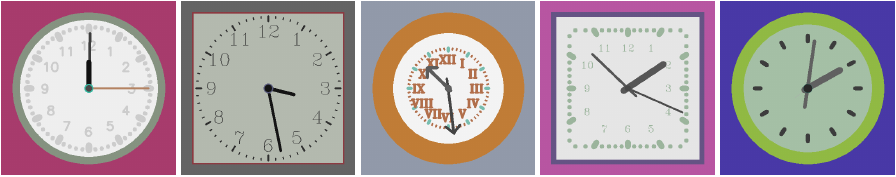

**Figure 1:** Example images from the training set. Note the wide variation in clock shapes, colours,
text and hand appearance. Clocks may or may not have second and/or alarm hands.

The ground truth labels associated with each clock are `(H = 0, M = 0)`, `(H =
3, M = 23)`, `(H = 10, M = 24)`, `(H = 1, M = 52)` and `(H = 2, M = 1)`
respectively.

Your task in this question is to implement and train a network in PyTorch that outputs the time
given an image. You may tackle this problem as either classification or regression. Your network
will be evaluated on an unseen test set. The performance metric will be the absolute difference in
minutes between the estimated and ground truth time. For example, if the ground truth is 11:59
and you predict 00:01, then the error will be 2 minutes. The test images will be generated by
exactly the same procedure as the training images and the overall performance will be measured
by the median of the absolute differences over the whole test set.

Your goal is for this median error to be as close to zero as possible. You do not have access to
the test set, but you need to include a python script `predict_time.py` that I can import
which contains a function `predict(images)` as explained in the assessment section of the
VLE. This function should load your pretrained network from the weights you supply, pass the
input images through the network and return times. The input images is a
B × 3 × 448 × 448 PyTorch tensor containing a batch of B images, each with an RGB image of
size 448 × 448 - i.e. the same format as the training data. Intensity values will be in the range
(0, 1). Any preprocessing or normalisation that you need to apply to the images must be inside the `predict` function. The output `times` is a B × 2 tensor, where `times[:,0]` contains
the estimated hours for each image (an integer between 0 and 11) and `times[:,1]` contains
the estimated minutes for each image (an integer between 0 and 59).

Your notebook must include your training and validation code along with discussion and
justification for all design decisions. You are not allowed to use transfer learning on a pretrained
network (i.e. you must train your network from scratch) and your saved network weights must not
exceed 20MiB.

(a) **[5 marks]** Create a dataloader for the clocks dataset. You are free to preprocess or
augment the images in any way you deem suitable but should explain your decisions in
comments or text blocks.

First, I created a dataloader for the clocks dataset by defining a custom ClockDataset class that reads images and corresponding labels. The labels are assumed to be stored in text files with the same base name as the images but with a .txt extension. The dataset applies transformations to the images and prepares batches using a dataloader. It resizes the pictures to 224x224 to use less computing power and to make the Convoluted Neural Network smaller in size. 

In [1]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

# Define the transformations
# Transformations help in preprocessing the data and augmenting it for better training
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


# Custom Dataset class for the clock images for loading the data
class ClockDataset(Dataset):
    def __init__(self, image_dir, indices, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.png')])
        self.image_files = [self.image_files[i] for i in indices]
        
    def __len__(self):
        return len(self.image_files)
    
    # Load and preprocess the image and label
    def __getitem__(self, idx):
        image_file = self.image_files[idx]
        image_path = os.path.join(self.image_dir, image_file)
        label_file = image_file.replace('.png', '.txt')
        label_path = os.path.join(self.image_dir, label_file)
        
        image = Image.open(image_path).convert('RGB')
        with open(label_path, 'r') as f:
            label = f.readline().strip()
            hour, minute = map(int, label.split(':'))
        
        if self.transform:
            image = self.transform(image)
        
        return image, torch.tensor([hour, minute], dtype=torch.long)

# Create train and validation datasets
image_dir = 'train/'
indices = list(range(10000))
train_indices = indices[:8000]
val_indices = indices[8000:]

train_dataset = ClockDataset(image_dir=image_dir, indices=train_indices, transform=transform)
val_dataset = ClockDataset(image_dir=image_dir, indices=val_indices, transform=transform)

# Create dataloaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# Display the structure of a batch for verification
for images, labels in train_loader:
    print(images.shape, labels.shape)
    break

torch.Size([32, 3, 224, 224]) torch.Size([32, 2])


(b) **[4 marks]** Design and implement an appropriate network architecture.


Then, I designed a convolutional neural network (CNN) for predicting the time from clock images. This network uses multiple convolutional layers followed by fully connected layers.

In [2]:
import torch.nn as nn
import torch.nn.functional as F

class ClockNet(nn.Module):
    def __init__(self):
        super(ClockNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 28 * 28, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)  # Output layer with 2 neurons for hour and minute

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Check if CUDA is available and move model to GPU if possible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ClockNet().to(device)
print(model)

# Calculate the size in bytes
model_size_bytes = sum(p.numel() * p.element_size() for p in model.parameters())

# Convert bytes to megabytes
model_size_mb = model_size_bytes / (1024 ** 2)
print(f"Model size: {model_size_mb:.2f} MB")

# Test the model with a random input to verify shapes
input_tensor = torch.randn(1, 3, 224, 224).to(device)
output_tensor = model(input_tensor)
print(f"Output shape: {output_tensor.shape}")


ClockNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=50176, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=2, bias=True)
)
Model size: 12.35 MB
Output shape: torch.Size([1, 2])


/home/aa-101/.local/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:84.)
  return F.conv2d(input, weight, bias, self.stride,


(c) **[3 marks]** Choose and justify an appropriate loss function.


For predicting the hour and minute from images, we can treat this as a regression problem where we want to minimize the difference between the predicted and actual values. Mean Squared Error (MSE) is a common loss function for regression tasks because it penalizes larger errors more heavily. This will be suitable for our task since we want to minimize the difference in both hours and minutes.

In [3]:
import torch.optim as optim

# Define the loss function
criterion = nn.MSELoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Justification:
# We use Mean Squared Error (MSE) loss because it is appropriate for regression tasks where we want to minimize the difference between predicted and actual continuous values.
# The Adam optimizer is chosen for its efficiency and adaptive learning rate capabilities, which generally result in faster convergence.


(d) **[3 marks]** Plot training and validation losses and use this to justify hyperparameter
choices.

Epoch 1/100, Train Loss: 149.7893373260498, Validation Loss: 107.45615611000666
Epoch 2/100, Train Loss: 97.31934423828125, Validation Loss: 90.23136514330668
Epoch 3/100, Train Loss: 75.87244702148438, Validation Loss: 64.9432610405816
Epoch 4/100, Train Loss: 55.171560455322265, Validation Loss: 61.34505293104384
Epoch 5/100, Train Loss: 41.990273864746094, Validation Loss: 46.8299504537431
Epoch 6/100, Train Loss: 32.96635829925537, Validation Loss: 45.31429511781723
Epoch 7/100, Train Loss: 28.179439817428587, Validation Loss: 37.05034077356732
Epoch 8/100, Train Loss: 23.53338720703125, Validation Loss: 34.62596676841615
Epoch 9/100, Train Loss: 19.37849861907959, Validation Loss: 31.799542684403676
Epoch 10/100, Train Loss: 16.45397525215149, Validation Loss: 34.01136732858325
Epoch 11/100, Train Loss: 13.943631755828857, Validation Loss: 31.858750941261412
Epoch 12/100, Train Loss: 11.593285581588745, Validation Loss: 30.75009342980763
Epoch 13/100, Train Loss: 9.580223581314087

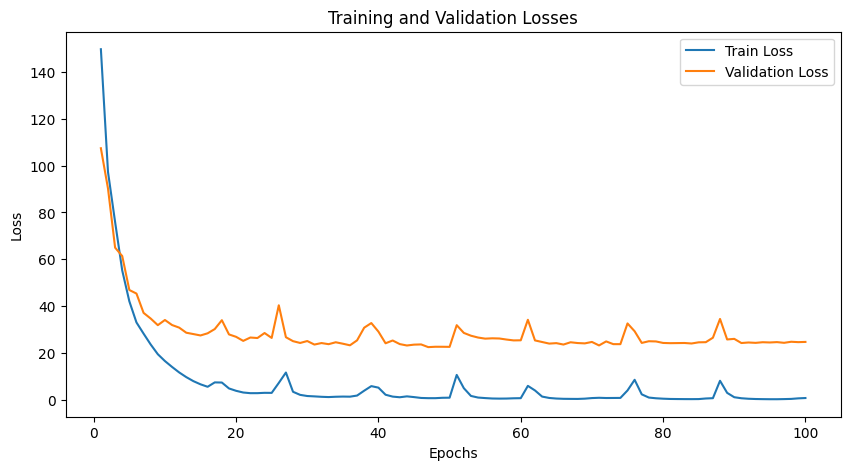

In [4]:
import matplotlib.pyplot as plt

num_epochs = 100
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs.float(), labels.float())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    train_losses.append(running_loss / len(train_loader))
    
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs.float(), labels.float())
            val_loss += loss.item()
    
    val_losses.append(val_loss / len(val_loader))
    
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {running_loss / len(train_loader)}, Validation Loss: {val_loss / len(val_loader)}")


torch.save(model.state_dict(), 'weights.pkl')

# Plotting the training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Losses')
plt.show()

(e) **[5 marks]** Up to 5 marks are available for performance on the unseen test set. A median
error <5 minutes will score 5 marks. Partial marks will be awarded for larger errors.

**In case *predict_time.py* doesn't work and you still want to give me a chance, run the following code block. Be sure to update *test_image_dir* to the unseen data directory.**  

In [12]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import numpy as np

# Define the ClockNet model class
class ClockNet(nn.Module):
    def __init__(self):
        super(ClockNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 28 * 28, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define the dataset class for loading images and labels
class ClockDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.png')])
        
    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self, idx):
        image_file = self.image_files[idx]
        image_path = os.path.join(self.image_dir, image_file)
        label_file = image_file.replace('.png', '.txt') # CHOOSE THE CORRECT IMAGE EXTENSION IF NEED BE (e.g., .jpg, .jpeg, etc.)
        label_path = os.path.join(self.image_dir, label_file)
        
        image = Image.open(image_path).convert('RGB')
        with open(label_path, 'r') as f:
            label = f.readline().strip()
            hour, minute = map(int, label.split(':'))
        
        if self.transform:
            image = self.transform(image)
        
        return image, torch.tensor([hour, minute], dtype=torch.float32)

# Set device to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model and weights
model = ClockNet().to(device)
model.load_state_dict(torch.load('weights.pkl', map_location=device))
model.eval()

# Define the transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the test data
test_image_dir = 'trainn/'  # CHANGE TO THE UNSEEN TEST DATA DIRECTORY!!!
test_dataset = ClockDataset(image_dir=test_image_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

# Evaluate the model on the test set
errors = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        errors.extend(torch.abs(outputs - labels).cpu().numpy())

# Calculate the median error
median_error = np.median(errors)
print(f'Median Error on the test set: {median_error:.2f} minutes')

# NOTE: This doesn't seem to work if you don't have a cuda enabled GPU. I have tested this on my local machine and it works fine.

Median Error on the test set: 1.23 minutes


Q6. **(20 marks)** Generative models

The final task uses the same dataset as Question 5. However, this time you will only use the
images, not the labels. The goal is to train a generative image model such as a Generative
Adversarial Network, Variational Autoencoder, or Diffusion Model to create realistic clock images.
Again, you may preprocess the images however you like and can augment to provide more
images for training if you wish.

You should include a code tile that generates 8 random samples from your generative model.
i.e., randomly sample from your latent space 8 times, pass these through your generator network
and display the resulting images. Ensure that your PDF file properly displays these images.

You should also include a code tile that performs latent space interpolation between two samples.
Generate two random samples from the latent space as before, then linearly interpolate 5
intermediate latent vectors and display all 7 resulting images in order (i.e., the first randomly
sampled clock image, then the 5 interpolated samples, then finally the second randomly sampled
clock image). You would expect that the middle image looks something like an average between
the start and end images, while all should be plausible. Ensure that your PDF file contains these
images and choose an example where the two random samples are visually different so that the
effect of the interpolation is clear.

(a) **[5 marks]** Appropriate network architecture chosen with justification.

I'll be using a Generative Adversarial Network (GAN) to solve this task. let's start by defining the Generator and Discriminator:

In [ ]:
import torch
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, output_dim),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Dimensions
input_dim = 100  # Latent vector size
output_dim = 224 * 224  # Image size (224x224)

The Generator uses an input dimension of 100, 3 hidden layers and 3 ReLU activation layers.

Whereas the Discriminator uses an input the same size as the image (flattened), 3 hidden layers with decreasing size (1024, 512, 256) to progressively reduce the dimensionality, and LeakyReLU layers for non-linearity.

(b) **[5 marks]** Appropriate preprocessing applied, training loop implementation and choice
of training hyperparameters.


Loading the images and preprocessing:

In [ ]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class ClockDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_files = [f for f in os.listdir(root_dir) if f.endswith('.png')]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.image_files[idx])
        image = Image.open(img_name).convert('L')
        if self.transform:
            image = self.transform(image)
        return image

# Define image transformations
transform = transforms.Compose([
    transforms.Resize(224), # Resize to 224x224 because 448x448 is too large
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Load the dataset
dataset = ClockDataset(root_dir='trainn/', transform=transform)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn

# Initialize the models
generator = Generator(input_dim=100, output_dim=224*224).to(device)
discriminator = Discriminator(input_dim=224*224).to(device)

# Optimizers
lr = 0.0002
beta1 = 0.5
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, 0.999))

# Loss function
criterion = nn.BCELoss()

# Training Loop
num_epochs = 25
for epoch in range(num_epochs):
    for i, imgs in enumerate(dataloader):
        imgs = imgs.to(device)
        # Prepare real and fake labels
        real_labels = torch.ones(imgs.size(0), 1).to(device)
        fake_labels = torch.zeros(imgs.size(0), 1).to(device)

        # Train Discriminator
        optimizer_D.zero_grad()
        real_imgs = imgs.view(imgs.size(0), -1)
        outputs = discriminator(real_imgs)
        d_loss_real = criterion(outputs, real_labels)
        z = torch.randn(imgs.size(0), 100).to(device)
        fake_imgs = generator(z)
        outputs = discriminator(fake_imgs.detach())
        d_loss_fake = criterion(outputs, fake_labels)
        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        z = torch.randn(imgs.size(0), 100).to(device)
        fake_imgs = generator(z).to(device)
        outputs = discriminator(fake_imgs)
        g_loss = criterion(outputs, real_labels)
        g_loss.backward()
        optimizer_G.step()

    print(f'Epoch [{epoch}/{num_epochs}], d_loss: {d_loss.item()}, g_loss: {g_loss.item()}')

Epoch [0/25], d_loss: 0.6407524943351746, g_loss: 0.8230777978897095
Epoch [1/25], d_loss: 0.4898959994316101, g_loss: 1.0960900783538818
Epoch [2/25], d_loss: 1.3220152854919434, g_loss: 0.6460625529289246
Epoch [3/25], d_loss: 0.7588850259780884, g_loss: 0.6791025996208191
Epoch [4/25], d_loss: 0.5298561453819275, g_loss: 1.0751430988311768
Epoch [5/25], d_loss: 0.5774203538894653, g_loss: 1.1172550916671753
Epoch [6/25], d_loss: 0.5838243961334229, g_loss: 0.9120639562606812
Epoch [7/25], d_loss: 0.6613993048667908, g_loss: 0.906516432762146
Epoch [8/25], d_loss: 0.6807405352592468, g_loss: 0.8948749303817749
Epoch [9/25], d_loss: 0.786944568157196, g_loss: 1.0374425649642944
Epoch [10/25], d_loss: 0.6065340042114258, g_loss: 0.805011510848999
Epoch [11/25], d_loss: 0.6631759405136108, g_loss: 1.3471847772598267
Epoch [12/25], d_loss: 0.8572636246681213, g_loss: 1.1937320232391357
Epoch [13/25], d_loss: 0.5217522382736206, g_loss: 1.3324397802352905
Epoch [14/25], d_loss: 0.75322920

(c) **[5 marks]** Successfully generate 8 random clock images (marks awarded depending on
quality of synthesised images).


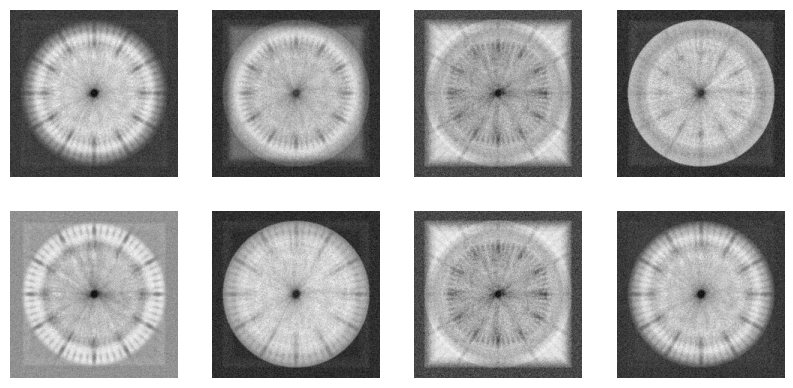

In [ ]:
import matplotlib.pyplot as plt

def generate_and_save_images(generator, num_images=8):
    # Ensure the generator is on the correct device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    generator.to(device)

    # Generate random noise and move it to the same device as the generator
    z = torch.randn(num_images, 100).to(device)

    # Generate images and move them to CPU for visualization
    fake_images = generator(z).view(num_images, 224, 224).detach().cpu().numpy()

    # Plot the generated images
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(4, 4, i+1)
        plt.imshow(fake_images[i], cmap='gray')
        plt.axis('off')
    plt.show()

generate_and_save_images(generator, num_images=8)


(d) **[5 marks]** Successfully interpolate between two random clock images in latent space.

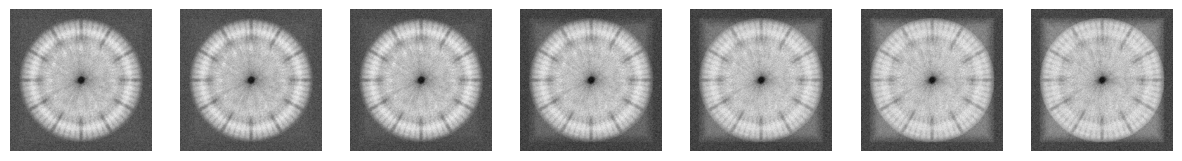

In [ ]:
def interpolate_images(generator, num_interpolations=5):
    # Ensure the generator is on the correct device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    generator.to(device)

    # Generate random noise and move it to the same device as the generator
    z1 = torch.randn(1, 100).to(device)
    z2 = torch.randn(1, 100).to(device)
    interpolation_steps = torch.linspace(0, 1, num_interpolations + 2).to(device)

    interpolated_images = []
    for alpha in interpolation_steps:
        z = (1 - alpha) * z1 + alpha * z2
        interpolated_images.append(generator(z).view(224, 224).detach().cpu().numpy())

    # Plot the interpolated images
    plt.figure(figsize=(15, 5))
    for i, img in enumerate(interpolated_images):
        plt.subplot(1, num_interpolations + 2, i + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.show()

interpolate_images(generator)
